## Лабораторная работа 5
## Математическая морфология
## Водяный Михаил
## РИМ-181228

In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.morphology import (closing, opening, binary_closing, binary_opening,binary_erosion, binary_dilation, erosion, dilation, diamond, disk, rectangle, square, star)
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
import matplotlib.pyplot as plt
from skimage import data
from sklearn.datasets import load_digits
from skimage import img_as_float, img_as_ubyte
from skimage.filters import rank
%matplotlib inline

In [2]:
img1 = imread('1.png', 1)
img2 = imread('2.png', 1)
img3 = imread('3.png', 1)
img4 = imread('4.png', 1)
img5 = imread('5.png', 1)
img6 = imread('6.jpg', 1)
img7 = imread('7.png', 1)
img8 = imread('8.png', 1)
img9 = imread('9.png', 1)

## Поиск границ (изображения 1-3)

<Figure size 432x288 with 0 Axes>

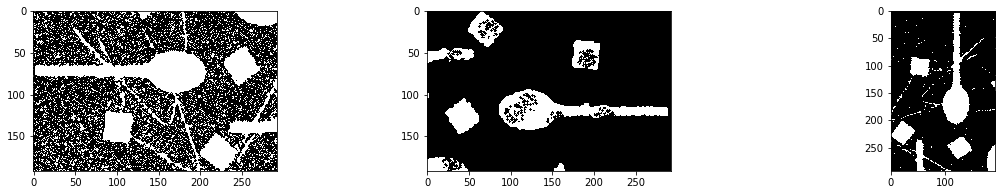

In [3]:
plt.set_cmap(cmap="gray")
plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img1)
plt.subplot(3, 3, 2)
plt.imshow(img2)
plt.subplot(3, 3, 3)
plt.imshow(img3)

In [4]:
img1_eros = erosion(img1, disk(3))
img1_eros_dil = dilation(img1_eros, disk(3))
img1_border1 = img1_eros_dil - img1_eros
img1_border2 = img1_eros - img1_eros_dil

<Figure size 432x288 with 0 Axes>

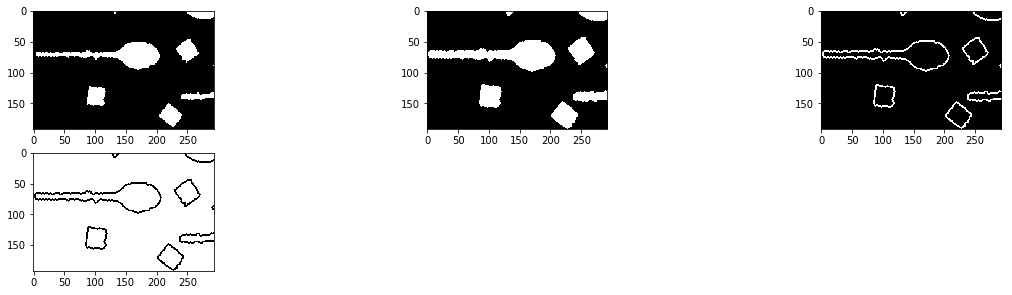

In [5]:
plt.set_cmap(cmap="gray")
plt.figure(figsize=(20,10))
plt.subplot(4, 3, 1)
plt.imshow(img1_eros)
plt.subplot(4, 3, 2)
plt.imshow(img1_eros_dil)
plt.subplot(4, 3, 3)
plt.imshow(img1_border1)
plt.subplot(4, 3, 4)
plt.imshow(img1_border2)


In [6]:
img2_eros = erosion(img2, disk(3))
img2_eros_dil = dilation(img2_eros, disk(3))
img2_border1 = img2_eros_dil - img2_eros
img2_border2 = img2_eros - img2_eros_dil

<Figure size 432x288 with 0 Axes>

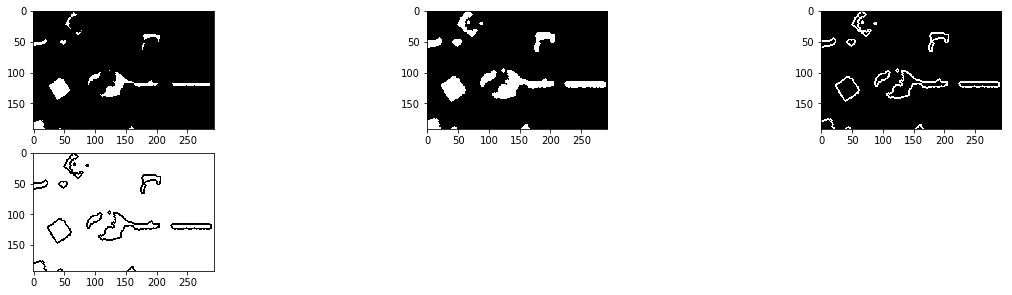

In [7]:
plt.set_cmap(cmap="gray")
plt.figure(figsize=(20,10))
plt.subplot(4, 3, 1)
plt.imshow(img2_eros)
plt.subplot(4, 3, 2)
plt.imshow(img2_eros_dil)
plt.subplot(4, 3, 3)
plt.imshow(img2_border1)
plt.subplot(4, 3, 4)
plt.imshow(img2_border2)

In [8]:
img3_eros = erosion(img3, disk(3))
img3_eros_dil = dilation(img3_eros, disk(3))
img3_border1 = img3_eros_dil - img3_eros
img3_border2 = img3_eros - img3_eros_dil

<Figure size 432x288 with 0 Axes>

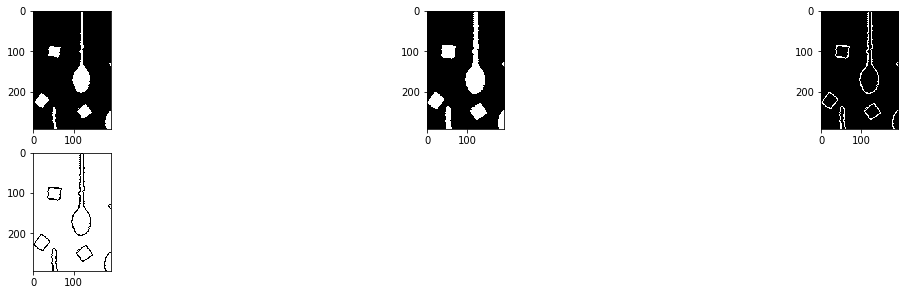

In [9]:
plt.set_cmap(cmap="gray")
plt.figure(figsize=(20,10))
plt.subplot(4, 3, 1)
plt.imshow(img3_eros)
plt.subplot(4, 3, 2)
plt.imshow(img3_eros_dil)
plt.subplot(4, 3, 3)
plt.imshow(img3_border1)
plt.subplot(4, 3, 4)
plt.imshow(img3_border2)

## Удаление шума (изображения 4-6)

<Figure size 432x288 with 0 Axes>

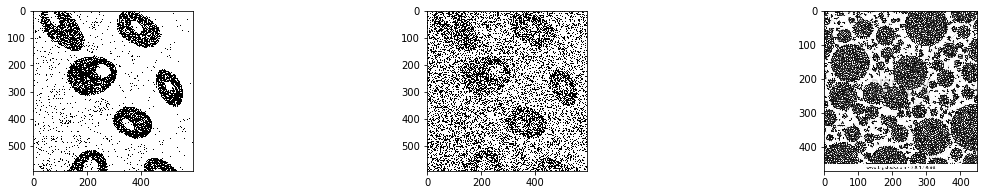

In [10]:
plt.set_cmap(cmap="gray")
plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img4)
plt.subplot(3, 3, 2)
plt.imshow(img5)
plt.subplot(3, 3, 3)
plt.imshow(img6)

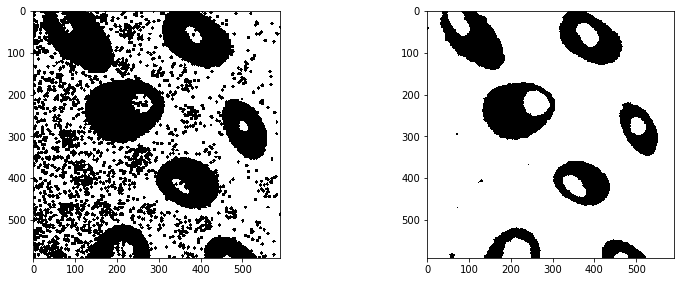

In [11]:
img4_eros = erosion(img4, disk(3))
img4_eros_dil =  dilation(img4_eros, disk(8))
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.imshow(img4_eros)
plt.subplot(2, 3, 2)
plt.imshow(img4_eros_dil)

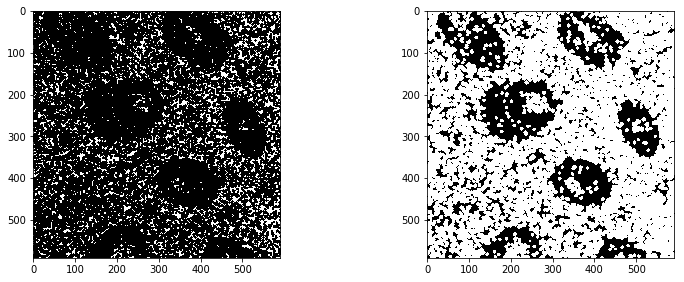

In [12]:
img5_eros = erosion(img5, disk(2))
img5_eros_dil =  dilation(img5_eros, disk(4))
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.imshow(img5_eros)
plt.subplot(2, 3, 2)
plt.imshow(img5_eros_dil)

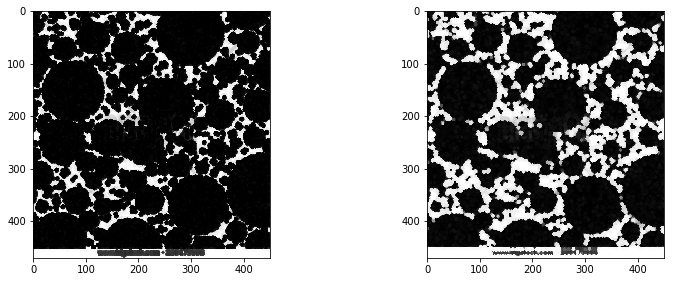

In [13]:
img6_eros = erosion(img6, disk(3))
img6_eros_dil =  dilation(img6_eros, disk(3))
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.imshow(img6_eros)
plt.subplot(2, 3, 2)
plt.imshow(img6_eros_dil)

## Удаление шума (изображения 7-9)

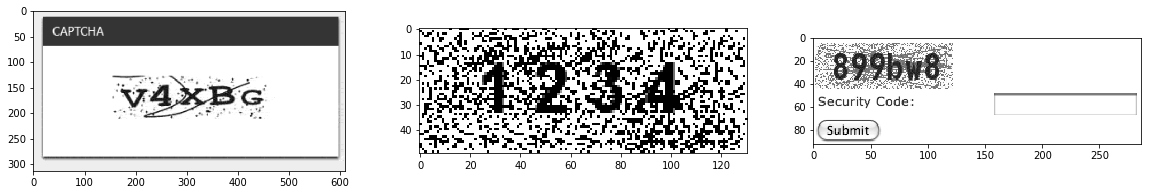

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.imshow(img7)
plt.subplot(3, 3, 2)
plt.imshow(img8)
plt.subplot(3, 3, 3)
plt.imshow(img9)

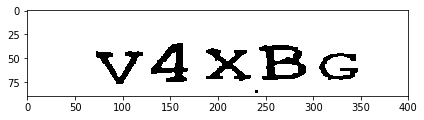

In [15]:
img7 = img7[110:200, 100:500]
img7_dil = dilation((img7 > 0.6), rectangle(3,3))
img7_eros_dil = erosion(img7_dil, rectangle(3,3))
imshow(img7_eros_dil)# Без шума

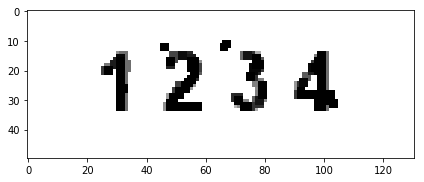

In [16]:
img8_dil = dilation(img8, rectangle(3,3))
img8_eros_dil = erosion(img8_dil, square(3))
imshow(img8_eros_dil)# Без шума

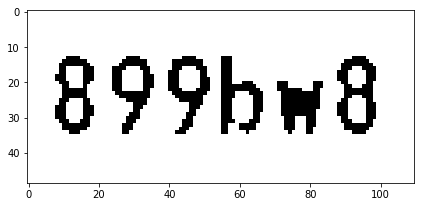

In [17]:
img9 = img9[1:50, 10:120]
img9_eros = erosion((img9 > 0.38), rectangle(2,2))
img9_eros_dil = dilation(img9_eros, rectangle(3,3))
imshow(img9_eros_dil)# Без шума

## Определение возраста дерева по спилу

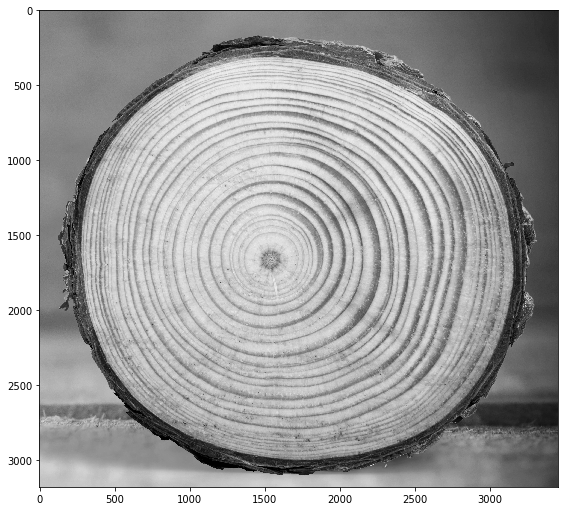

In [18]:
img_tree = imread('11.jpg')
plt.figure(figsize=(8,8))
img_tree = rgb2gray(img_tree)
imshow(img_tree)

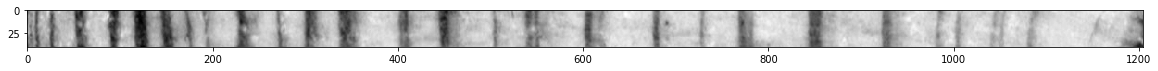

In [19]:
img_tree_cut = img_tree[1610:1650, 285:1490]
plt.figure(figsize=(20,20))
plt.imshow(img_tree_cut)

D:\Programs\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


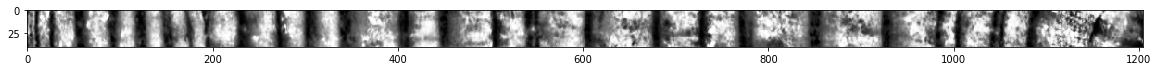

In [20]:
from skimage.filters.rank import equalize
img_tree_cut= equalize(img_tree_cut, selem=disk(30))
plt.figure(figsize=(20,20))
plt.imshow(img_tree_cut)

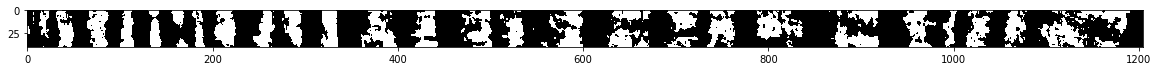

In [21]:
img_tree_cut = img_as_float(img_tree_cut>170)
plt.figure(figsize=(20,20))
plt.imshow(img_tree_cut)

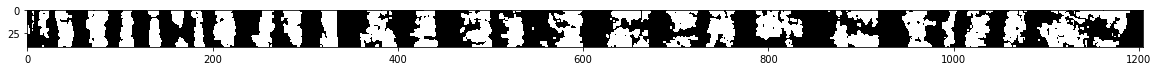

In [22]:
img_tree_cut = dilation(img_tree_cut, square(2))
plt.figure(figsize=(20,20))
plt.imshow(img_tree_cut)

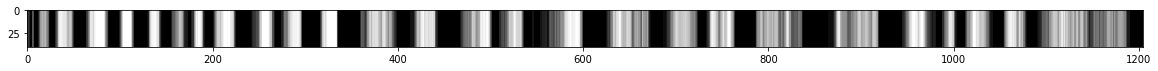

In [23]:
line = np.mean(img_tree_cut, axis = 0)
img_tree_cut = np.array([line]*40)
plt.figure(figsize=(20,20))
plt.imshow(img_tree_cut)

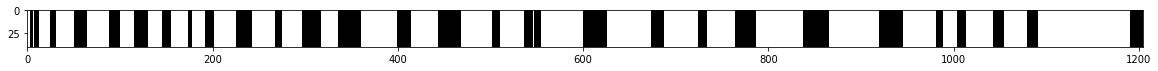

In [24]:
img_tree_cut = img_as_float(binary_erosion(img_tree_cut, rectangle(2,2)))
plt.figure(figsize=(20,20))
plt.imshow(img_tree_cut)

In [25]:
def get_tree_age(X): 
    count_series = 0
    
    for i in range(len(X)):
        if X[i]>0.3:
            X[i]=1
        else:
            X[i]=0
            
    for i in range(len(X)-1):
        if X[i+1]!=X[i]:
            if X[i]==0:
                count_series+=1
    print('Result:', count_series)

In [26]:
get_tree_age(line)

Result: 31


In [27]:
img_tree[1610:1650, 285:1490] = img_tree_cut

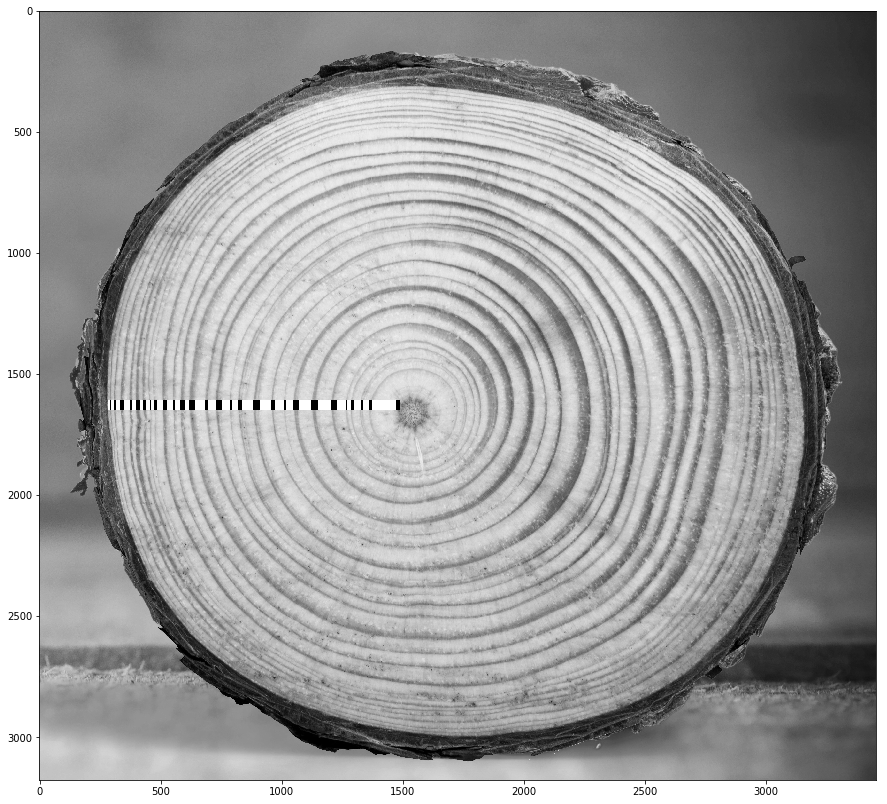

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(img_tree)